# IMPORTS

In [1]:
import wrangle as wr
import explore as ex
import stats_conclude as sc
import evaluate as ev
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# WRANGLE

In [2]:
df = wr.get_telco_churn()
df.head()

CSV file found...
Load in successful, preparing to split...


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [31]:
# clean
dft = wr.clean_telco(df)
dft.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type,internet_service_type,payment_type,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
0,0002-ORFBO,0,0,1,1,9,1,0,0,1,...,One year,DSL,Mailed check,1,0,0,0,1,0,0
1,0003-MKNFE,1,0,0,0,9,1,1,0,0,...,Month-to-month,DSL,Mailed check,0,0,0,0,1,0,0
2,0004-TLHLJ,1,0,0,0,4,1,0,0,0,...,Month-to-month,Fiber optic,Electronic check,0,0,0,1,0,1,0
3,0011-IGKFF,1,1,1,0,13,1,0,0,1,...,Month-to-month,Fiber optic,Electronic check,0,0,0,1,0,1,0
4,0013-EXCHZ,0,1,1,0,3,1,0,0,0,...,Month-to-month,Fiber optic,Mailed check,0,0,0,0,1,1,0


# EXPLORE

## Univariate exploration as well as gathering revenue numbers

In [17]:
dft.shape

(7043, 28)

In [12]:
# total revenue from all services
total_revenue = dft.total_charges.sum()
total_revenue

16056624.3

In [78]:
# establishing subset for yes phone customers
yes_phone = dft[dft.phone_service==1]

In [36]:
# revenue coming from phone
yes_phone_revenue = yes_phone.total_charges.sum()
yes_phone_revenue

15036220.75

In [40]:
# 7043 customers total
dft_customer = dft.shape[0]
dft_customer

7043

In [39]:
# 6361 customers phone
yes_phone_customer = yes_phone.shape[0]
yes_phone_customer

6361

In [46]:
# proportion of customer base for yes phone
yes_phone_customer_proportion = round(yes_phone_customer / dft_customer * 100,0)
yes_phone_customer_proportion

90.0

In [47]:
# proportion of revenue for yes phone
yes_phone_revenue_proportion = round(yes_phone_revenue / total_revenue * 100,0)
yes_phone_revenue_proportion

94.0

In [68]:
# number of fiber customers
fiber_customers = dft[dft['internet_service_type_Fiber optic'] == 1].shape[0]
fiber_customers

3096

In [77]:
# number of yes phone and fiber customers (displaying that ALL fiber have phone service) ** verification check ** 
fiber_phone_customers = dft [(dft.phone_service == 1) & (dft['internet_service_type_Fiber optic'] == 1)].shape[0]
fiber_phone_customers

3096

In [82]:
# churn rate for phone and fiber customers - yes churn
churned_phone_fiber_customers = dft [(dft.phone_service==1) & (dft['internet_service_type_Fiber optic']==1) & (dft.churn==1)].shape[0]
churned_phone_fiber_customers

1297

In [84]:
# churn rate for phone and fiber customers - no churn
not_churned_phone_fiber_customers = dft[(dft.phone_service==1) & (dft['internet_service_type_Fiber optic']==1) & (dft.churn==0)].shape[0]
not_churned_phone_fiber_customers

1799

In [86]:
# proportion of churned phone and fiber customers
round(churned_phone_fiber_customers / fiber_phone_customers *100,0)

42.0

In [93]:
# cost of churned customers
loss_revenue = round(dft [(dft.phone_service==1) & (dft['internet_service_type_Fiber optic']==1) & (dft.churn==1)]['total_charges'].sum(),0)
loss_revenue

2483257.0

In [117]:
# monthly fiber charges for churned
dft [(dft['internet_service_type_Fiber optic'] == 1) & (dft.contract_type=='Month-to-month') & (dft.churn==1)]['monthly_charges'].describe()

count    1162.000000
mean       86.473322
std        11.110323
min        67.750000
25%        76.412500
50%        85.375000
75%        95.425000
max       117.450000
Name: monthly_charges, dtype: float64

In [118]:
# monthly fiber charges for not churned
dft [(dft['internet_service_type_Fiber optic'] == 1)& (dft.contract_type=='Month-to-month') & (dft.churn==0)]['monthly_charges'].describe()

count    966.000000
mean      87.680228
std       11.273117
min       68.600000
25%       78.962500
50%       87.850000
75%       95.437500
max      116.500000
Name: monthly_charges, dtype: float64

---
|CHURNED: MONTH-TO-MONTH FIBER|
* count = 1,162
* mean  = $86.47

* 25th percentile:  $76.42/month

* 50th percentile:  $85.38/month

* 75th percentile:  $95.43/month

|NOT CHURNED: MONTH-TO-MONTH FIBER|
* count = 996
* mean  = $87.68

* 25th percentile:  $78.96/month

* 50th percentile:  $87.85/month

* 75th percentile:  $95.44/month

**|DIFFERENCE: MONTH-TO-MONTH FIBER|**
* **53.9%** churn rate
* **$-1.21** higher monthly average

* 25th percentile:  **$-8.96** higher/month

* 50th percentile:  **$-2.47** higher/month

* 75th percentile:  **$-0.01** higher/month

In [121]:
# monthly phone charges for churned
dft [(dft.phone_service == 1) & (dft.contract_type=='Month-to-month') & (dft.churn==1)]['monthly_charges'].describe()

count    1502.000000
mean       76.743842
std        21.908330
min        18.850000
25%        69.750000
50%        80.250000
75%        93.775000
max       117.450000
Name: monthly_charges, dtype: float64

In [123]:
# monthly phone charges for not churned
dft [(dft.phone_service == 1) & (dft.contract_type=='Month-to-month') & (dft.churn==0)]['monthly_charges'].describe()

count    1997.000000
mean       64.186405
std        27.909664
min        18.750000
25%        45.550000
50%        69.950000
75%        86.450000
max       116.500000
Name: monthly_charges, dtype: float64

|CHURNED: MONTH-TO-MONTH PHONE|
* count = 1,502
* mean  = $76.74

* 25th percentile:  $69.75/month

* 50th percentile:  $80.25/month

* 75th percentile:  $93.78/month

|NOT CHURNED: MONTH-TO-MONTH PHONE|
* count = 1,997
* mean  = $64.19

* 25th percentile:  $45.55/month

* 50th percentile:  $69.95/month

* 75th percentile:  $86.45/month

**|DIFFERENCE PHONE|**
* **43%** churn rate
* **$12.55** higher monthly average

* 25th percentile:  **$24.31** higher/month

* 50th percentile:  **$10.30** higher/month

* 75th percentile:  **$7.33** higher/month

In [125]:
# monthly one line month to month phone charges for churned
dft [(dft.phone_service == 1) & (dft.contract_type=='Month-to-month') & (dft.churn==1) & (dft.multiple_lines==0)]['monthly_charges'].describe()

count    780.000000
mean      66.427051
std       22.807088
min       18.850000
25%       50.325000
50%       70.700000
75%       81.100000
max      110.100000
Name: monthly_charges, dtype: float64

In [126]:
# monthly one line month to month phone charges for not churned
dft [(dft.phone_service == 1) & (dft.contract_type=='Month-to-month') & (dft.churn==0) & (dft.multiple_lines==0)]['monthly_charges'].describe()

count    1237.00000
mean       53.48080
std        26.37284
min        18.75000
25%        20.45000
50%        54.75000
75%        74.80000
max       108.25000
Name: monthly_charges, dtype: float64

|CHURNED: ONE LINE, MONTH-TO-MONTH, PHONE|
* count = 780
* mean  = $66.43

* 25th percentile:  $50.33/month

* 50th percentile:  $70.70/month

* 75th percentile:  $81.10/month

|NOT CHURNED: ONE LINE, MONTH-TO-MONTH, PHONE|
* count = 1,237
* mean  = $53.48

* 25th percentile:  $20.45/month

* 50th percentile:  $54.75/month

* 75th percentile:  $74.80/month

**|DIFFERENCE: ONE LINE, MONTH-TO-MONTH, PHONE|**
* **38.7%** churn rate
* **$12.95** higher monthly average

* 25th percentile:  **$29.88** higher/month

* 50th percentile:  **$15.95** higher/month

* 75th percentile:  **$6.30** higher/month

-------

> # Full Takeways

## Phone Customer Takeaways:
* 93.6% of phone revenue comes from phone service
    * totaling $15,035,873.75
    * 6,361 customers

* 6.4% of phone revenue comes from no phone service
    * totaling $1,020,294.95
    * 682 customers

---

* 95.5% of churned yes phone/yes fiber lost Telco
    * $2,600,062.40
    * 1,297 customers
        * *NOTE: yes phone customers **only** have fiber*
            * **accounting for 18.4% of customer base!**

> most important -> focus on yes phone, yes fiber
    
* 4.5% of churned no phone/yes DSL costs Telco
    * $116,804.95
    * 170 customers
        * *NOTE: churned no phone customers **only** had DSL*

> least important -> small base, small figures overall

Phone Churn customers = 20.8% of customer base
        
---

## Internet Customer Takeaways:
* 61.8% of internet revenue comes from fiber
    * totaling $9,923,622.95
    * 3,096 customers

* 31.9% of internet revenue comes from dsl
    * totaling $5,121,410.85
    * 2,421 customers

* 6.3% of internet revenue comes from customers without internet
    * totaling $1,011,265.80
    * 1,526 customers
    
---

* 69.4% of total churned yes fiber costs Telco
    * $2,483,257.45
    * 1,297 customers
        * **18.4% of customer base! (matches churned yes phone customers)**
    
* 24.6% of total churned yes DSL costs Telco
    * $360,016.5
    * 459 customers
    
* 6% of total churned no internet costs Telco
    * $19,652.95
    * 113 customers

Internet Churn Customers = 26.5% of customer base

---
Total customer base: 7,043

## Important Observations:
* *Everyone who has fiber, has phone service*
    * 3,096 customers
* DSL with phone = 1,739 customers
* DSL with no phone = 682 customers
* No internet = 1,526 customers
    * equals 7,043
* Monthly charges were very similar for churned and not churned customers with fiber internet
    * therefore does not SEEM to impact, run stats tests here

* Monthly charges for phone seems significant
    
|CHURNED: MONTH-TO-MONTH PHONE|
* count = 1,502
* mean  = $76.74

* 25th percentile:  $69.75/month

* 50th percentile:  $80.25/month

* 75th percentile:  $93.78/month

|NOT CHURNED: MONTH-TO-MONTH PHONE|
* count = 1,997
* mean  = $64.19

* 25th percentile:  $45.55/month

* 50th percentile:  $69.95/month

* 75th percentile:  $86.45/month

**|DIFFERENCE PHONE|**
* **43%** churn rate
* **$12.55** higher monthly average

* 25th percentile:  **$24.31** higher/month

* 50th percentile:  **$10.30** higher/month

* 75th percentile:  **$7.33** higher/month

---
|CHURNED: MONTH-TO-MONTH FIBER|
* count = 1,162
* mean  = $86.47

* 25th percentile:  $76.42/month

* 50th percentile:  $85.38/month

* 75th percentile:  $95.43/month

|NOT CHURNED: MONTH-TO-MONTH FIBER|
* count = 996
* mean  = $87.68

* 25th percentile:  $78.96/month

* 50th percentile:  $87.85/month

* 75th percentile:  $95.44/month

**|DIFFERENCE: MONTH-TO-MONTH FIBER|**
* **53.9%** churn rate
* **$-1.21** higher monthly average

* 25th percentile:  **$-8.96** higher/month

* 50th percentile:  **$-2.47** higher/month

* 75th percentile:  **$-0.01** higher/month
---
> The differnces say the price paid for fiber does not affect churn but the price paid for phone service does affect churn for month-to-month contracts. Since everyone who has fiber internet has phone service, it makes sense that the churn rate of fiber would be adversely affected by the cost of phone service. People aren't leaving because of fiber price per month, they're leaving because of phone price per month.

**So why are the monthly phone customers who churned paying more? Additional services or lack OF? Investigate further...**

---
|CHURNED: ONE LINE, MONTH-TO-MONTH, PHONE|
* count = 780
* mean  = $66.43

* 25th percentile:  $50.33/month

* 50th percentile:  $70.70/month

* 75th percentile:  $81.10/month

|NOT CHURNED: ONE LINE, MONTH-TO-MONTH, PHONE|
* count = 1,237
* mean  = $53.48

* 25th percentile:  $20.45/month

* 50th percentile:  $54.75/month

* 75th percentile:  $74.80/month

**|DIFFERENCE: ONE LINE, MONTH-TO-MONTH, PHONE|**
* **38.7%** churn rate
* **$12.95** higher monthly average

* 25th percentile:  **$29.88** higher/month

* 50th percentile:  **$15.95** higher/month

* 75th percentile:  **$6.30** higher/month

In [5]:
# split
train, validate, test = wr.split_telco(dft)

Prepared DF: (7043, 28)
Train: (4225, 28)
Validate: (1409, 28)
Test: (1409, 28)


In [6]:
# assign columns to model to sets
target = 'churn'

# creating a duplicate X_train to use for explore function containing 
# the target
X_train_explore = train[['churn',
 'phone_service',
 'multiple_lines',
 'monthly_charges',
 'total_charges',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None']]

# X_train, validate, and test to be used for modeling
X_train = train[[
 'phone_service',
 'multiple_lines',
 'monthly_charges',
 'total_charges',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None']]
X_validate = validate[[
 'phone_service',
 'multiple_lines',
 'monthly_charges',
 'total_charges',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None']]
X_test = test[[
 'phone_service',
 'multiple_lines',
 'monthly_charges',
 'total_charges',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None']]
y_train = train[target]
y_validate = validate[target]
y_test = test[target]

CATEGORICAL VARIABLE
**CHURN**
0    3104
1    1121
Name: churn, dtype: int64
0    73.467456
1    26.532544
Name: churn, dtype: float64

HYPOTHESIZE
H_0: churn does not affect churn
H_a: churn affects churn

ANALYZE and SUMMARIZE
Observed
[[3104    0]
 [   0 1121]]

Expected
[[2280  823]
 [ 823  297]]

----
chi^2 = 4219.8715
p-value = 0.0 < 0.05
----
We reject the null hypothesis.

VISUALIZE


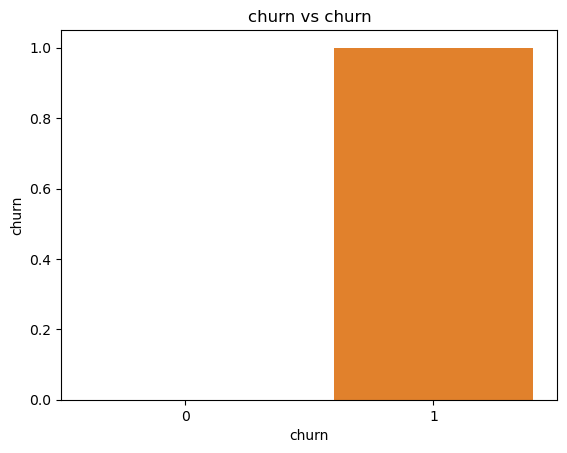



CATEGORICAL VARIABLE
**PHONE_SERVICE**
1    3832
0     393
Name: phone_service, dtype: int64
1    90.698225
0     9.301775
Name: phone_service, dtype: float64

HYPOTHESIZE
H_0: phone service does not affect churn
H_a: phone service affects churn

ANALYZE and SUMMARIZE
Observed
[[ 295   98]
 [2809 1023]]

Expected
[[ 288  104]
 [2815 1016]]

----
chi^2 = 0.4796
p-value = 0.48858174831711587 < 0.05
----
We fail to reject the null hypothesis.

VISUALIZE


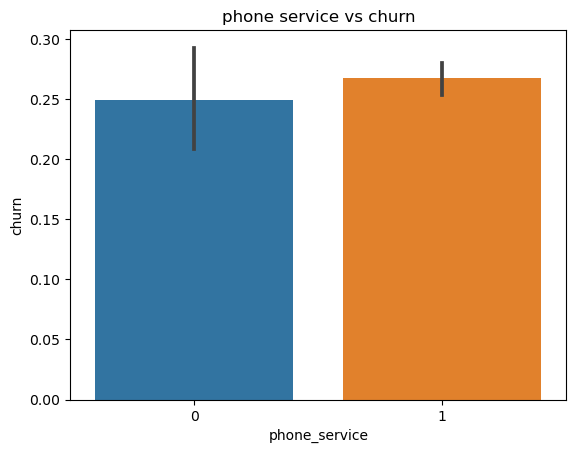



CATEGORICAL VARIABLE
**MULTIPLE_LINES**
0    2418
1    1807
Name: multiple_lines, dtype: int64
0    57.230769
1    42.769231
Name: multiple_lines, dtype: float64

HYPOTHESIZE
H_0: multiple lines does not affect churn
H_a: multiple lines affects churn

ANALYZE and SUMMARIZE
Observed
[[1812  606]
 [1292  515]]

Expected
[[1776  641]
 [1327  479]]

----
chi^2 = 6.0966
p-value = 0.013544410804300413 < 0.05
----
We reject the null hypothesis.

VISUALIZE


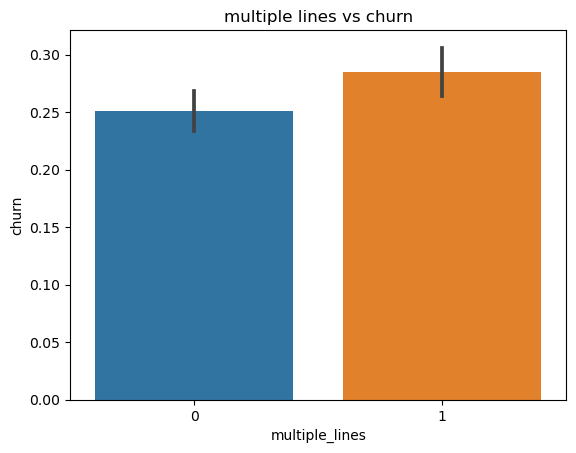



CATEGORICAL VARIABLE
**CONTRACT_TYPE_ONE YEAR**
0    3312
1     913
Name: contract_type_One year, dtype: int64
0    78.390533
1    21.609467
Name: contract_type_One year, dtype: float64

HYPOTHESIZE
H_0: contract type one year does not affect churn
H_a: contract type one year affects churn

ANALYZE and SUMMARIZE
Observed
[[2289 1023]
 [ 815   98]]

Expected
[[2433  878]
 [ 670  242]]

----
chi^2 = 148.1016
p-value = 4.507269760114123e-34 < 0.05
----
We reject the null hypothesis.

VISUALIZE


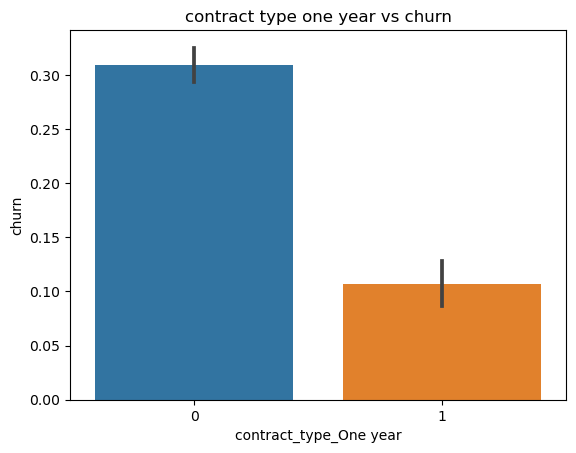



CATEGORICAL VARIABLE
**CONTRACT_TYPE_TWO YEAR**
0    3230
1     995
Name: contract_type_Two year, dtype: int64
0    76.449704
1    23.550296
Name: contract_type_Two year, dtype: float64

HYPOTHESIZE
H_0: contract type two year does not affect churn
H_a: contract type two year affects churn

ANALYZE and SUMMARIZE
Observed
[[2142 1088]
 [ 962   33]]

Expected
[[2372  857]
 [ 731  263]]

----
chi^2 = 358.3147
p-value = 6.5547793791877045e-80 < 0.05
----
We reject the null hypothesis.

VISUALIZE


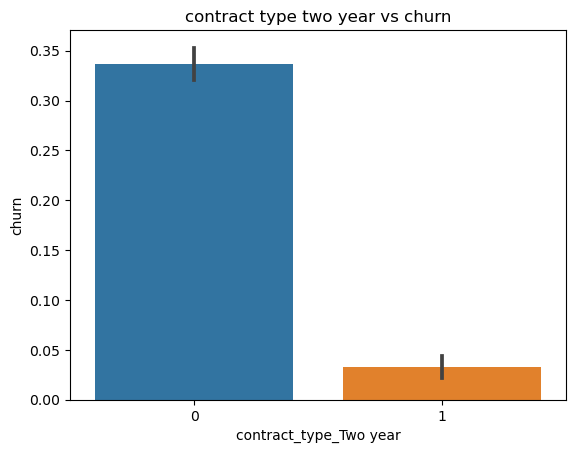



CATEGORICAL VARIABLE
**INTERNET_SERVICE_TYPE_FIBER OPTIC**
0    2370
1    1855
Name: internet_service_type_Fiber optic, dtype: int64
0    56.094675
1    43.905325
Name: internet_service_type_Fiber optic, dtype: float64

HYPOTHESIZE
H_0: internet service type fiber optic does not affect churn
H_a: internet service type fiber optic affects churn

ANALYZE and SUMMARIZE
Observed
[[2022  348]
 [1082  773]]

Expected
[[1741  628]
 [1362  492]]

----
chi^2 = 387.4117
p-value = 3.0293763443640615e-86 < 0.05
----
We reject the null hypothesis.

VISUALIZE


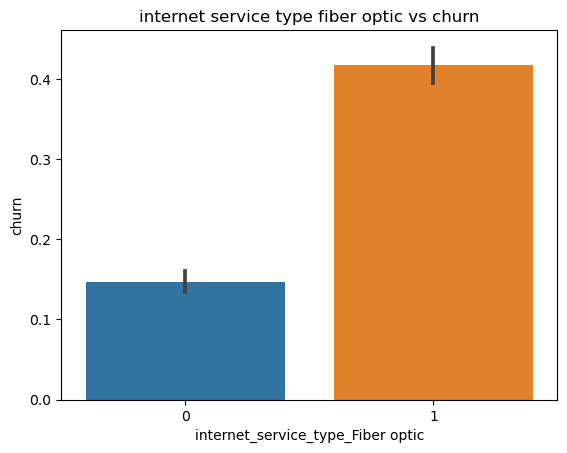



CATEGORICAL VARIABLE
**INTERNET_SERVICE_TYPE_NONE**
0    3302
1     923
Name: internet_service_type_None, dtype: int64
0    78.153846
1    21.846154
Name: internet_service_type_None, dtype: float64

HYPOTHESIZE
H_0: internet service type none does not affect churn
H_a: internet service type none affects churn

ANALYZE and SUMMARIZE
Observed
[[2255 1047]
 [ 849   74]]

Expected
[[2425  876]
 [ 678  244]]

----
chi^2 = 206.4856
p-value = 8.028710753333225e-47 < 0.05
----
We reject the null hypothesis.

VISUALIZE


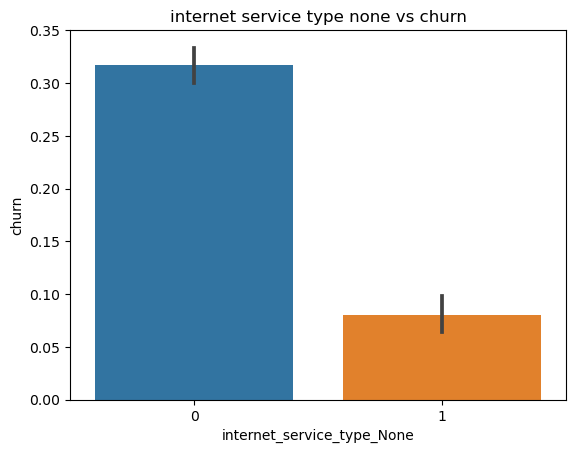



NUMERICAL VARIABLE
If deemed significant, proceed with the appropriate statistics tests.


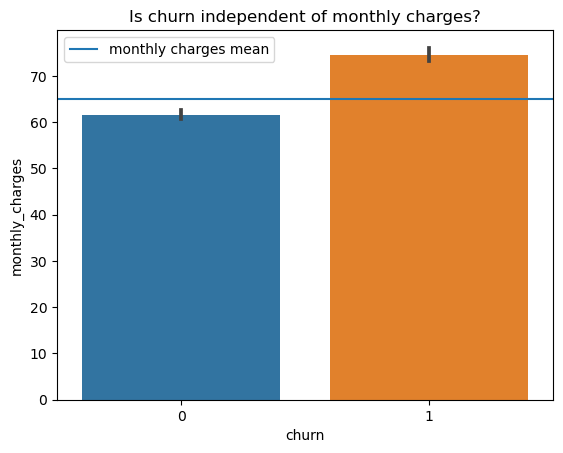


NUMERICAL VARIABLE
If deemed significant, proceed with the appropriate statistics tests.


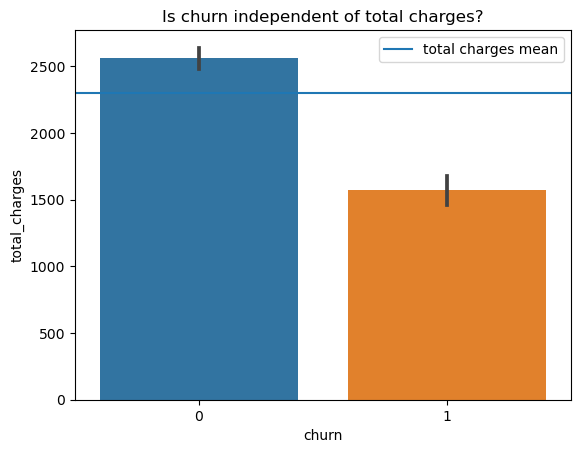

In [7]:
# runs everything through the explore phase (see docstring)
ex.explore(X_train_explore)

In [8]:
# cleaning and deciding what columns to keep ...
dft = wr.clean_telco(df)
dft.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type,internet_service_type,payment_type,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
0,0002-ORFBO,0,0,1,1,9,1,0,0,1,...,One year,DSL,Mailed check,1,0,0,0,1,0,0
1,0003-MKNFE,1,0,0,0,9,1,1,0,0,...,Month-to-month,DSL,Mailed check,0,0,0,0,1,0,0
2,0004-TLHLJ,1,0,0,0,4,1,0,0,0,...,Month-to-month,Fiber optic,Electronic check,0,0,0,1,0,1,0
3,0011-IGKFF,1,1,1,0,13,1,0,0,1,...,Month-to-month,Fiber optic,Electronic check,0,0,0,1,0,1,0
4,0013-EXCHZ,0,1,1,0,3,1,0,0,0,...,Month-to-month,Fiber optic,Mailed check,0,0,0,0,1,1,0


# MODEL

DECISION TREE
For depth of 1, the accuracy is 0.73
For depth of 2, the accuracy is 0.79
For depth of 3, the accuracy is 0.79
For depth of 4, the accuracy is 0.8
For depth of 5, the accuracy is 0.8
For depth of 6, the accuracy is 0.81
For depth of 7, the accuracy is 0.82
For depth of 8, the accuracy is 0.83
For depth of 9, the accuracy is 0.85
For depth of 10, the accuracy is 0.86

The baseline accuracy is 0.73


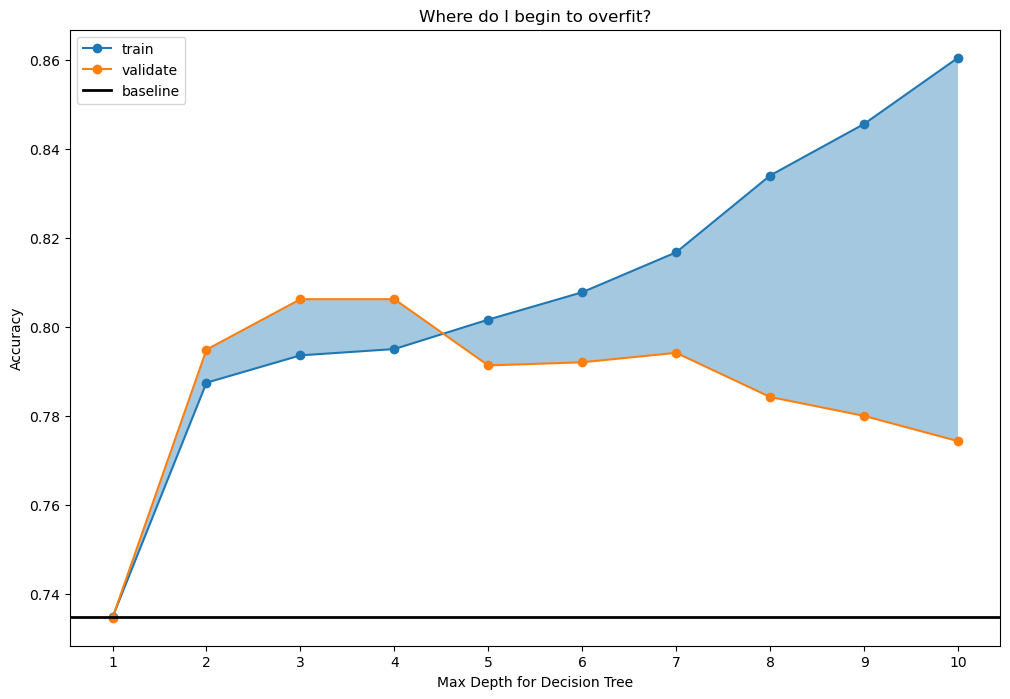

RANDOM FOREST
For depth of  1, the accuracy is 0.73
For depth of  2, the accuracy is 0.73
For depth of  3, the accuracy is 0.77
For depth of  4, the accuracy is 0.79
For depth of  5, the accuracy is 0.79
For depth of  6, the accuracy is 0.8
For depth of  7, the accuracy is 0.81
For depth of  8, the accuracy is 0.83
For depth of  9, the accuracy is 0.85
For depth of 10, the accuracy is 0.86
The baseline accuracy is 0.73


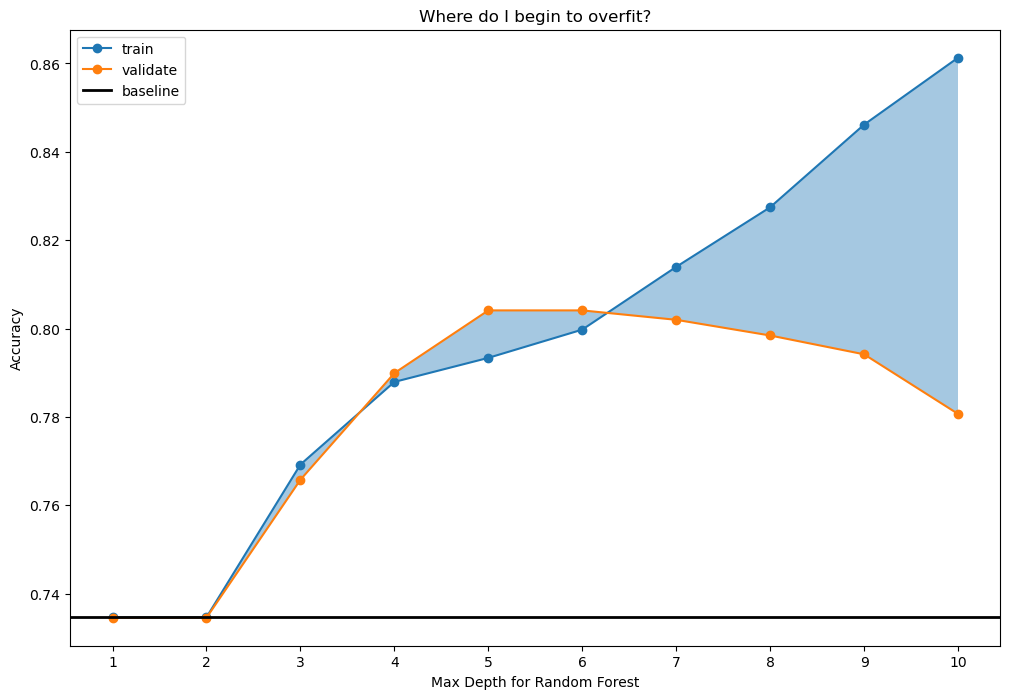

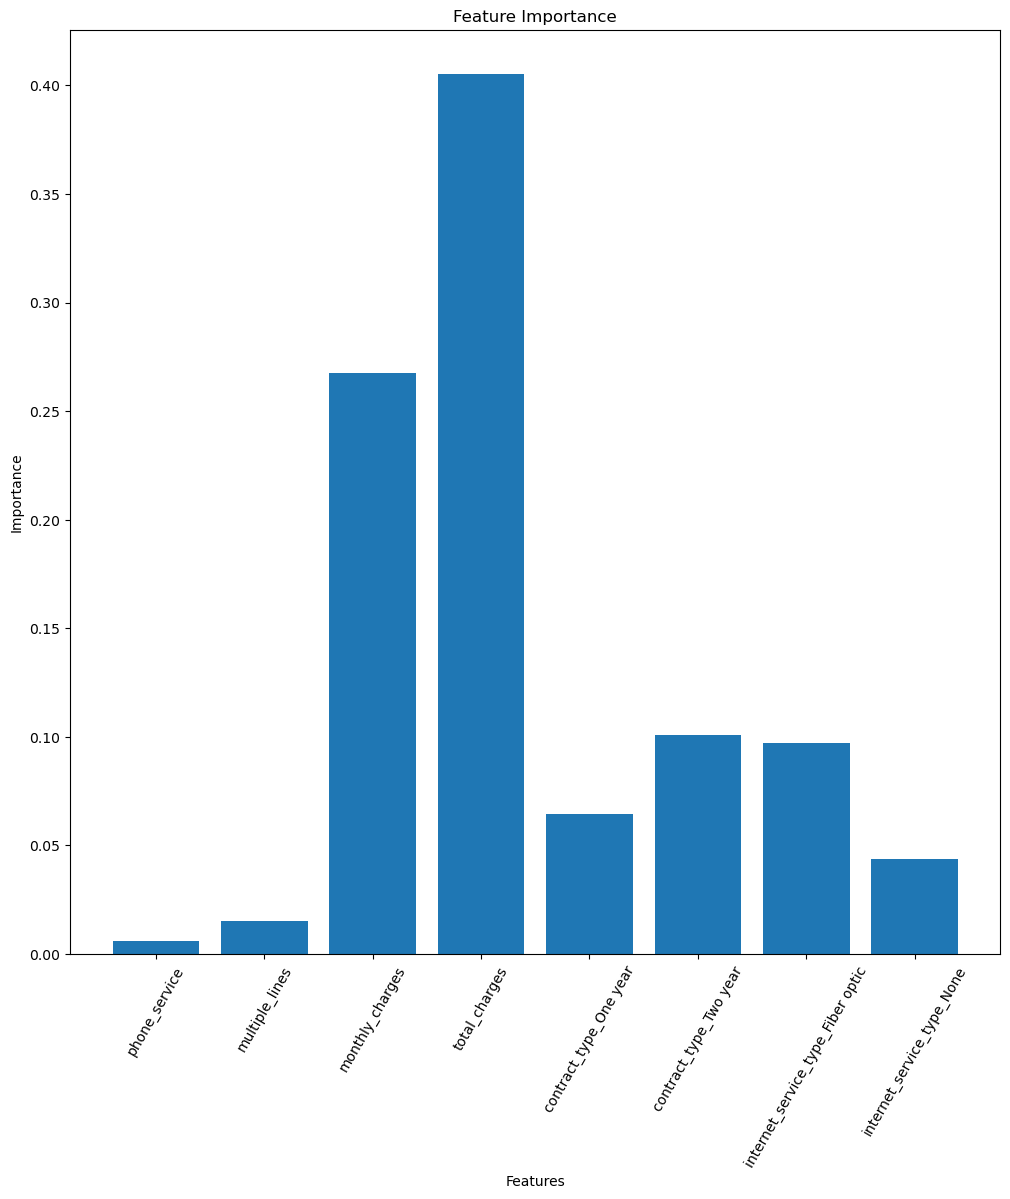

KNN
The number of features sent in : 8 and are ['phone_service', 'multiple_lines', 'monthly_charges', 'total_charges', 'contract_type_One year', 'contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None'].
22 is the number of neighbors that produces the best fit model.
The accuracy score for the train model is 0.79.
The accuracy score for the validate model is 0.78.


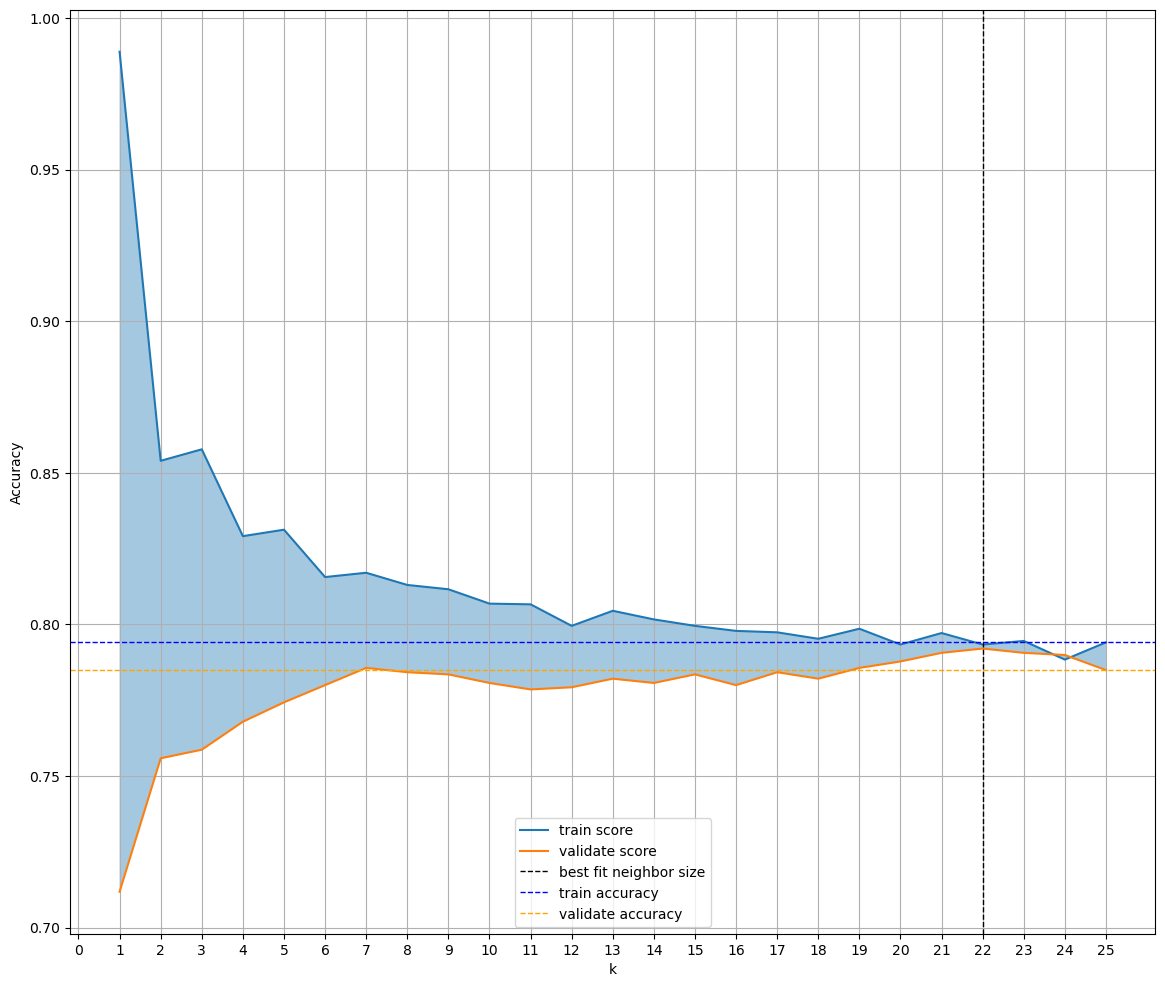

LOGISTIC REGRESSION
Train Dataset
The train model's accuracy is 0.78
The baseline accuracy is 0.73.
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      3104
           1       0.61      0.50      0.55      1121

    accuracy                           0.78      4225
   macro avg       0.72      0.69      0.70      4225
weighted avg       0.77      0.78      0.78      4225

LOGISTIC REGRESSION
Validate Dataset
The validate model's accuracy is 0.79
The baseline accuracy is 0.73.
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [9]:
# run all 4 models
# use feature importance to identify potentially important columns
ev.all_4_classifiers(train, validate, nn=26)

# Modeling takeaways

* Train and Validate scores perfrom roughly the same for all models.

* Random Forest with depth of 6 will move forward to Test.

* Note HIGH recall scores in Logit Classification Model!